In [6]:
import sys
sys.path.append('../lol')

import numpy as np
from lol import LOL
from sklearn.decomposition import PCA

from sklearn.ensemble import RandomForestClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis

from sklearn.model_selection import StratifiedKFold

## Grab data

In [2]:
X = np.load('../../nomads/source/j1c/classifier/data/data_isotropic.npy')
y = np.load('../../nomads/source/j1c/classifier/data/gaba_label.npy')
mask = np.load('../../nomads/source/j1c/classifier/data/15_9_9_edge_mask.npy')

X = X[mask]
y = y[mask]

In [94]:
np.save('RORB_synapse_cubes', X)
np.save('RORB_synapse_targets', y)

In [95]:
X.shape

(927, 9720)

In [4]:
X = X.reshape((927, -1))

In [50]:
kfold = StratifiedKFold(n_splits=5, shuffle=True)

lol_lda_error = []
lol_rf_error = []

for train, test in kfold.split(X, y):
    X_train, X_test = X[train], X[test]
    y_train, y_test = y[train], y[test]
    
    l = LOL()
    l.fit(X_train, y_train)
    components = l.components_
    
    lol_lda = []
    lol_rf = []
    for i in range(1, 101):
        X_train_transformed = X_train @ components.T[:, :i]
        X_test_transformed = X_test @ components.T[:, :i]
        
        lda = LinearDiscriminantAnalysis()
        lda.fit(X_train_transformed, y_train)
        
        pred = lda.predict(X_test_transformed)
        misclassification = (pred != y_test).sum() / y_test.size
        lol_lda.append(misclassification)
        
        rf = RandomForestClassifier()
        rf.fit(X_train_transformed, y_train)
        pred = rf.predict(X_test_transformed)
        misclassification = (pred != y_test).sum() / y_test.size
        lol_rf.append(misclassification)
        
        print("Finished Components {}".format(i), end="\r", flush=True)
    
    lol_lda_error.append(lol_lda)
    lol_rf_error.append(lol_rf)

In [58]:
lol_lda_error = np.array(lol_lda_error)
lol_rf_error = np.array(lol_rf_error)

In [60]:
kfold = StratifiedKFold(n_splits=5, shuffle=True)

pca_lda_error = []
pca_rf_error = []

for train, test in kfold.split(X, y):
    X_train, X_test = X[train], X[test]
    y_train, y_test = y[train], y[test]
    
    p = PCA()
    p.fit(X_train, y_train)
    components = p.components_
    
    pca_lda = []
    pca_rf = []
    for i in range(1, 101):
        X_train_transformed = X_train @ components.T[:, :i]
        X_test_transformed = X_test @ components.T[:, :i]
        
        lda = LinearDiscriminantAnalysis()
        lda.fit(X_train_transformed, y_train)
        
        pred = lda.predict(X_test_transformed)
        misclassification = (pred != y_test).sum() / y_test.size
        pca_lda.append(misclassification)
        
        rf = RandomForestClassifier()
        rf.fit(X_train_transformed, y_train)
        pred = rf.predict(X_test_transformed)
        misclassification = (pred != y_test).sum() / y_test.size
        pca_rf.append(misclassification)
        
        print("Finished Components {}".format(i), end="\r", flush=True)
    
    pca_lda_error.append(pca_lda)
    pca_rf_error.append(pca_rf)

In [61]:
pca_lda_error = np.array(pca_lda_error)
pca_rf_error = np.array(pca_rf_error)

In [65]:
pca_lda_error.mean(axis=0)

array([0.11866318, 0.11866318, 0.11543737, 0.11758791, 0.11328684,
       0.10679454, 0.09708224, 0.0981517 , 0.09816914, 0.09708224,
       0.09059576, 0.08736995, 0.08737576, 0.08630049, 0.08414414,
       0.08521941, 0.08630049, 0.0852136 , 0.08306306, 0.08306306,
       0.08629468, 0.08305725, 0.08413252, 0.08413833, 0.08521941,
       0.08413833, 0.08305725, 0.08305725, 0.08197617, 0.0852136 ,
       0.0852136 , 0.08089509, 0.08305144, 0.08305144, 0.08089509,
       0.08088928, 0.08088928, 0.08088928, 0.08197036, 0.08197036,
       0.08304563, 0.0841209 , 0.08520198, 0.08520198, 0.08412671,
       0.08304563, 0.08196455, 0.08196455, 0.08196455, 0.08196455,
       0.08304563, 0.08304563, 0.08196455, 0.08197036, 0.08197036,
       0.07981982, 0.07981982, 0.07981982, 0.07873874, 0.07873874,
       0.07766347, 0.07765766, 0.07766347, 0.0765882 , 0.07766347,
       0.07657658, 0.07765185, 0.07765185, 0.07657658, 0.07657658,
       0.07657658, 0.07765766, 0.07765766, 0.07658239, 0.07874

In [67]:
lol_rf_error.mean(axis=0)

array([0.18338274, 0.08198198, 0.07010753, 0.06795699, 0.07655914,
       0.06147632, 0.07010171, 0.07658239, 0.06360942, 0.07657076,
       0.07007847, 0.07118861, 0.07334496, 0.07658239, 0.0657832 ,
       0.06792793, 0.07550131, 0.06577739, 0.0700959 , 0.0657832 ,
       0.07117698, 0.07010171, 0.07224644, 0.08306306, 0.07225806,
       0.07009009, 0.07657658, 0.0765882 , 0.06903226, 0.07981401,
       0.07657658, 0.06795118, 0.0700959 , 0.08304563, 0.06901482,
       0.07873874, 0.07439117, 0.06686428, 0.07332752, 0.06146469,
       0.08412671, 0.07120604, 0.07767509, 0.07551874, 0.07441441,
       0.07982563, 0.08198198, 0.07872711, 0.07765766, 0.07658239,
       0.0809009 , 0.07658239, 0.08197617, 0.07982563, 0.08630049,
       0.07981401, 0.07659401, 0.08304563, 0.09276954, 0.07550712,
       0.08627724, 0.09057251, 0.08197617, 0.07333915, 0.07332752,
       0.07764603, 0.07657076, 0.08302819, 0.08199361, 0.07336239,
       0.0787213 , 0.09275792, 0.07333333, 0.08306888, 0.06795

In [62]:
import matplotlib.pyplot as plt

In [90]:
x_range = np.arange(1, 101)
chance = np.repeat(y_test.sum() / y_test.size, 100)
fig, ax = plt.subplots(figsize=(10, 6))

ax.plot(x_range, lol_lda_error.mean(axis=0), label='LOL + LDA')
ax.plot(x_range, lol_rf_error.mean(axis=0), label='LOL + RF')
ax.plot(x_range, pca_lda_error.mean(axis=0), label='PCA + LDA')
ax.plot(x_range, pca_rf_error.mean(axis=0), label='PCA + RF')
ax.plot(x_range, chance, color='grey', label='Chance')
ax.set_title('Comparison of LOL/PCA with LDA/RF Classifier')
ax.set_xlabel('Embedded Dimensions')
ax.set_ylabel('Misclassification Rate')
ax.legend()

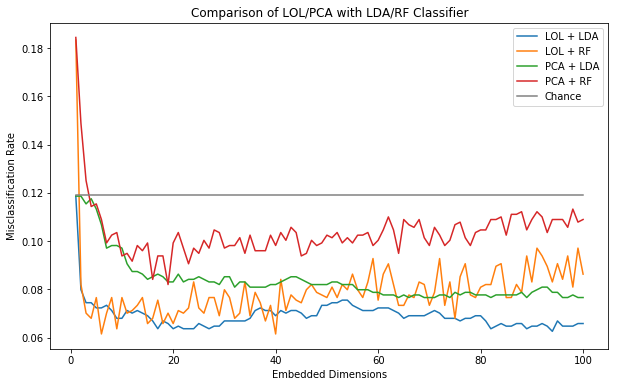

In [91]:
fig

In [92]:
plt.close('all')